# Toy Example

In [2]:
import sys, os
from pyprojroot import here

# spyder up to find the root
root = here(project_files=[".here"])

# append to path
sys.path.append(str(root))

%load_ext autoreload
%autoreload 2

## Import Packages

In [3]:
# Data
from survae.data.datasets.toy import SineWaveDataset, CheckerboardDataset
from torch.utils.data import DataLoader

# Model
import torch
import torch.nn as nn
from survae.flows import Flow
from survae.distributions import StandardNormal


# Optim
from torch.optim import Adam

# Plot
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [4]:
train = SineWaveDataset(num_points=128*1000)
test = SineWaveDataset(num_points=128*1000)
train_loader = DataLoader(train, batch_size=128, shuffle=False)
test_loader = DataLoader(test, batch_size=128, shuffle=True)

## MarkDown

In [122]:
from survae.transforms import AffineCouplingBijection, ActNormBijection, Reverse
from survae.transforms import LogisticMixtureCouplingBijection, RationalQuadraticSplineCouplingBijection, GaussianMixtureCouplingBijection
from survae.transforms import Sigmoid, Logit
from survae.transforms.bijections.elementwise_nonlinear import GaussianMixtureCDF, LogisticMixtureCDF, RQSplineCDF, InverseGaussCDF, KernelLogisticCDF
from survae.transforms import Linear
from survae.transforms.bijections.linear_orthogonal import LinearHouseholder, FastHouseholder
from survae.transforms.bijections.conv1x1 import Conv1x1Householder
from survae.nn.layers import ElementwiseParams

# def net(n_features):
#     return nn.Sequential(nn.Linear(1, 200), nn.ReLU(),
#                        nn.Linear(200, 100), nn.ReLU(),
#                        nn.Linear(100, n_features), ElementwiseParams(n_features))

# # RealNVP Model
# model = Flow(base_dist=StandardNormal((2,)),
#              transforms=[
#                AffineCouplingBijection(net(2)), ActNormBijection(2), Reverse(2),
#                AffineCouplingBijection(net(2)), ActNormBijection(2), Reverse(2),
#                AffineCouplingBijection(net(2)), ActNormBijection(2), Reverse(2),
#                AffineCouplingBijection(net(2)), ActNormBijection(2),
#              ])

# # Flow++ Model
# num_mixtures = 8
# num_params = 3 * num_mixtures

# def net(n_features):
#     return nn.Sequential(nn.Linear(1, 200), nn.ReLU(),
#                        nn.Linear(200, 100), nn.ReLU(),
#                        nn.Linear(100, num_params), ElementwiseParams(num_params))

# model = Flow(base_dist=StandardNormal((2,)),
#              transforms=[
#                Sigmoid(), LogisticMixtureCouplingBijection(net(2), num_mixtures=num_mixtures), Logit(), Reverse(2),
#                Sigmoid(), LogisticMixtureCouplingBijection(net(2), num_mixtures=num_mixtures), Logit(), Reverse(2),
#                Sigmoid(), LogisticMixtureCouplingBijection(net(2), num_mixtures=num_mixtures), Logit(), Reverse(2),
#                Sigmoid(), LogisticMixtureCouplingBijection(net(2), num_mixtures=num_mixtures), Logit(),
#              ])
# # model = Flow(base_dist=StandardNormal((2,)),
# #              transforms=[
# #                GaussianMixtureCouplingBijection(net(2), num_mixtures=num_mixtures), Logit(), Reverse(2),
# #                GaussianMixtureCouplingBijection(net(2), num_mixtures=num_mixtures), Logit(), Reverse(2),
# #                GaussianMixtureCouplingBijection(net(2), num_mixtures=num_mixtures), Logit(), Reverse(2),
# #                GaussianMixtureCouplingBijection(net(2), num_mixtures=num_mixtures), Logit(),
# #              ])


# # Marginal GF (1 Layer)
# num_mixtures = 8
# num_params = 3 * num_mixtures

# def net(n_features):
#     return nn.Sequential(nn.Linear(1, 200), nn.ReLU(),
#                        nn.Linear(200, 100), nn.ReLU(),
#                        nn.Linear(100, num_params), ElementwiseParams(num_params))

# model = Flow(base_dist=StandardNormal((2,)),
#              transforms=[
#                 GaussianMixtureCDF((2,), num_mixtures=num_mixtures), Logit()
#              ])

# # GF (Logistic Mixture CDF)
# num_mixtures = 12


# model = Flow(base_dist=StandardNormal((2,)),
#              transforms=[
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(), LinearHouseholder(2, 2),
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(), LinearHouseholder(2, 2),
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(), LinearHouseholder(2, 2),
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(), LinearHouseholder(2, 2),
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(), LinearHouseholder(2, 2),
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(), LinearHouseholder(2, 2),
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(), LinearHouseholder(2, 2),
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(), LinearHouseholder(2, 2),
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(), LinearHouseholder(2, 2),
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(), LinearHouseholder(2, 2),
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(), LinearHouseholder(2, 2),
#     LogisticMixtureCDF((2,), num_mixtures=num_mixtures), Logit(),
#              ])

# # GF (Logistic Mixture CDF)
# num_mixtures = 12


# model = Flow(base_dist=StandardNormal((2,)),
#              transforms=[
#     GaussianMixtureCDF((2,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(2, 2),
#     GaussianMixtureCDF((2,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(2, 2),
#     GaussianMixtureCDF((2,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(2, 2),
#     GaussianMixtureCDF((2,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(2, 2),
#     GaussianMixtureCDF((2,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(2, 2),
#     GaussianMixtureCDF((2,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(2, 2),
#              ])

# GF (Logistic Kernel CDF)
num_mixtures = 12

from survae.transforms import UniformDequantization, Augment
from survae.distributions import StandardNormal, StandardUniform

model = Flow(base_dist=StandardNormal((4,)),
             transforms=[
    Augment(StandardUniform((2,)), x_size=2),
    GaussianMixtureCDF((4,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(4, 2),
    GaussianMixtureCDF((4,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(4, 2),
    GaussianMixtureCDF((4,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(4, 2),
    GaussianMixtureCDF((4,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(4, 2),
    GaussianMixtureCDF((4,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(4, 2),
    GaussianMixtureCDF((4,), num_mixtures=num_mixtures), InverseGaussCDF(), FastHouseholder(4, 2),
             ])


# # GF (NSF)
# num_bins = 4
# num_layers = 12


# model = Flow(base_dist=StandardNormal((2,)),
#              transforms=[
#                  RQSplineCDF((2,), num_bins=num_bins), LinearHouseholder(2, 2), 
#                  RQSplineCDF((2,), num_bins=num_bins), LinearHouseholder(2, 2),
#                  RQSplineCDF((2,), num_bins=num_bins), LinearHouseholder(2, 2),
#                  RQSplineCDF((2,), num_bins=num_bins), LinearHouseholder(2, 2),
#                  RQSplineCDF((2,), num_bins=num_bins), LinearHouseholder(2, 2),
#                  RQSplineCDF((2,), num_bins=num_bins), LinearHouseholder(2, 2),
#                  RQSplineCDF((2,), num_bins=num_bins), LinearHouseholder(2, 2),
#              ])


# # NSF Model
# num_bins = 8
# num_params = 3 * num_bins + 1

# def net(n_features):
#     return nn.Sequential(nn.Linear(1, 200), nn.ReLU(),
#                        nn.Linear(200, 100), nn.ReLU(),
#                        nn.Linear(100, num_params), ElementwiseParams(num_params))
# model = Flow(base_dist=StandardNormal((2,)),
#              transforms=[
#                Sigmoid(), RationalQuadraticSplineCouplingBijection(net(2), num_bins=num_bins), Logit(), Reverse(2),
#                Sigmoid(), RationalQuadraticSplineCouplingBijection(net(2), num_bins=num_bins), Logit(), Reverse(2),
#                Sigmoid(), RationalQuadraticSplineCouplingBijection(net(2), num_bins=num_bins), Logit(), Reverse(2),
#                Sigmoid(), RationalQuadraticSplineCouplingBijection(net(2), num_bins=num_bins), Logit(),
#              ])


### Demo Data

In [123]:
test_x = train[:1_000]

In [124]:
loss = model.log_prob(test_x)


In [125]:
z, ldj = model.forward_transform(test_x)
x_approx = model.inverse_transform(z)



In [126]:
torch.testing.assert_allclose(test_x, x_approx)

In [127]:
import corner

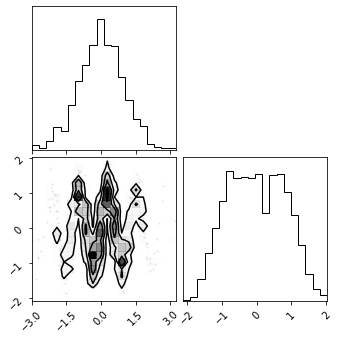

In [128]:
fig = corner.corner(test_x.detach().numpy())

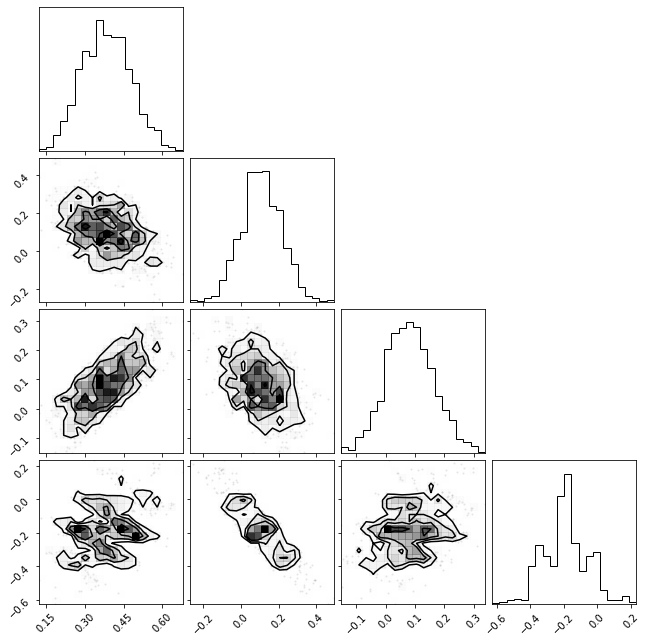

In [129]:
fig = corner.corner(z.detach().numpy())

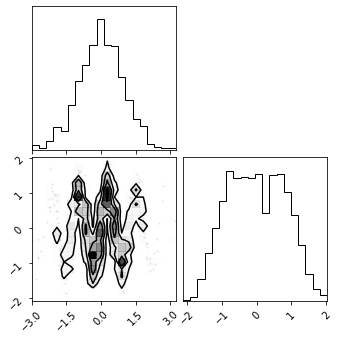

In [130]:
fig = corner.corner(x_approx.detach().numpy())

## Trainer

In [131]:
import pytorch_lightning as pl

class Learner2DPlane(pl.LightningModule):
    def __init__(self, model:nn.Module):
        super().__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        
        # loss function
        loss = -self.model.log_prob(batch).mean()
        
        return {'loss': loss}

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=1e-2)

    def train_dataloader(self):
        return train_loader

In [132]:
# initialize trainer
learn = Learner2DPlane(model)

In [133]:
n_epochs = 10

# initialize trainer
trainer = pl.Trainer(min_epochs=1, max_epochs=n_epochs, gpus=1)

# train model
trainer.fit(learn)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type | Params
-------------------------------
0 | model | Flow | 912   
-------------------------------
912       Trainable params
0         Non-trainable params
912       Total params
0.004     Total estimated model params size (MB)
/datadrive/eman/miniconda3/envs/gaussflow-gpu/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: -1it [00:00, ?it/s]

## Latent Space

In [134]:
# subset data
x = test.data

z_latent, ldj = model.forward_transform(x)

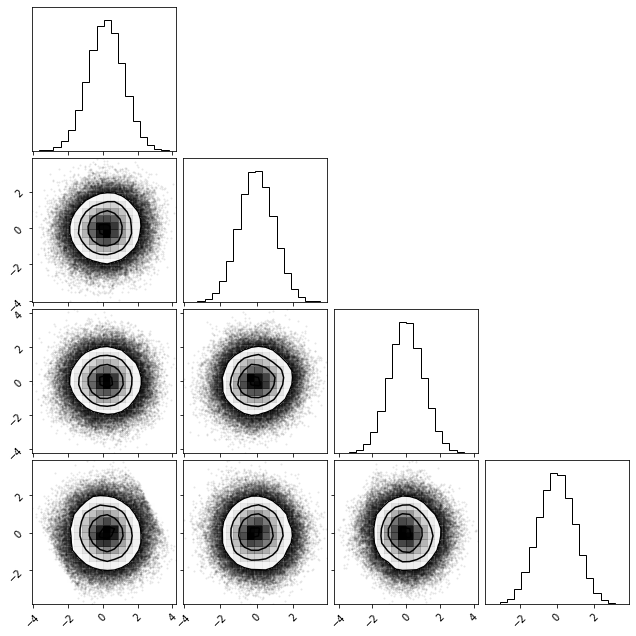

In [135]:
fig = corner.corner(z_latent.detach().numpy())

## Sampling

In [136]:
print('Sampling...')
data = test.data.numpy()
samples = model.sample(100_000).detach().numpy()

Sampling...


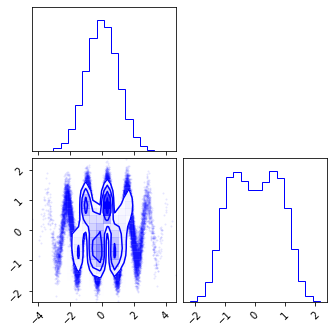

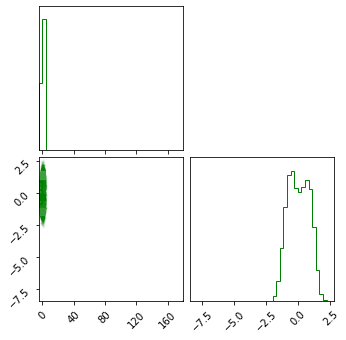

In [139]:
fig = corner.corner(data, color="blue")
fig = corner.corner(samples, color="green", hist_bin_factor=2)

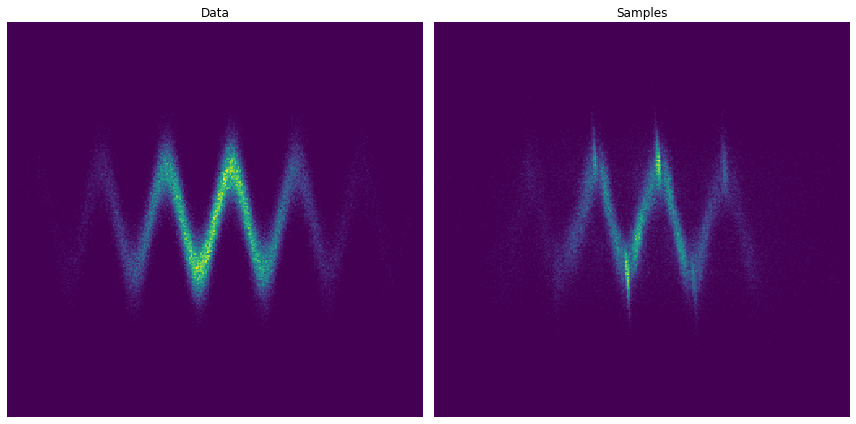

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].set_title('Data')
ax[0].hist2d(data[...,0], data[...,1], bins=256, range=[[-4, 4], [-4, 4]])
ax[0].set_xlim([-4, 4]); ax[0].set_ylim([-4, 4]); ax[0].axis('off')
ax[1].set_title('Samples')
ax[1].hist2d(samples[...,0], samples[...,1], bins=256, range=[[-4, 4], [-4, 4]])
ax[1].set_xlim([-4, 4]); ax[1].set_ylim([-4, 4]); ax[1].axis('off')
plt.tight_layout()
plt.show()

